<a href="https://colab.research.google.com/github/ishaanpaul98/Trading/blob/main/Trading%20methods/Bollinger_Band_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = yf.download('AMZN', start = '2011-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,181.369995,186.000000,181.210007,184.220001,184.220001,5331400
2011-01-04,186.149994,187.699997,183.779999,185.009995,185.009995,5031800
2011-01-05,184.100006,187.449997,184.070007,187.419998,187.419998,3418800
2011-01-06,186.500000,187.410004,185.250000,185.860001,185.860001,3179700
2011-01-07,187.880005,188.449997,183.740005,185.490005,185.490005,5221700
...,...,...,...,...,...,...
2022-04-01,3282.989990,3316.540039,3246.389893,3271.199951,3271.199951,2851800
2022-04-04,3282.500000,3367.889893,3264.110107,3366.929932,3366.929932,2494100
2022-04-05,3354.830078,3362.209961,3265.320068,3281.100098,3281.100098,2686400


In [ ]:
#Simple Moving Average
df['SMA'] = df.Close.rolling(window=200).mean()

In [ ]:
#Standard Deviation
df['stddev'] = df.Close.rolling(window=200).std()

In [ ]:
#Upper band
df['Upper'] = df.SMA + 2*df.stddev

In [ ]:
#Lower band
df['Lower'] = df.SMA - 2*df.stddev

In [ ]:
#Buying signals
df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)

In [ ]:
#Selling signals
df['Sell_Signal'] = np.where(df.Upper < df.Close, True, False)

In [ ]:
df = df.dropna()

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,stddev,Upper,Lower,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,,
2011-10-17,244.289993,246.710007,240.669998,242.330002,242.330002,4779000,195.695350,19.109593,233.914535,157.476165,False,True
2011-10-18,242.309998,244.610001,236.619995,243.880005,243.880005,4609700,195.993650,19.393105,234.779860,157.207440,False,True
2011-10-19,240.669998,243.330002,229.250000,231.529999,231.529999,6715100,196.226250,19.539135,235.304520,157.147980,False,False
2011-10-20,232.130005,234.740005,229.800003,233.610001,233.610001,4524900,196.457200,19.706784,235.870768,157.043632,False,False
2011-10-21,236.910004,237.000000,230.600006,234.779999,234.779999,4572500,196.701800,19.877448,236.456697,156.946903,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,3282.989990,3316.540039,3246.389893,3271.199951,3271.199951,2851800,3329.311160,217.073818,3763.458796,2895.163524,False,False
2022-04-04,3282.500000,3367.889893,3264.110107,3366.929932,3366.929932,2494100,3328.711310,216.801746,3762.314803,2895.107817,False,False
2022-04-05,3354.830078,3362.209961,3265.320068,3281.100098,3281.100098,2686400,3327.847010,216.644426,3761.135862,2894.558159,False,False


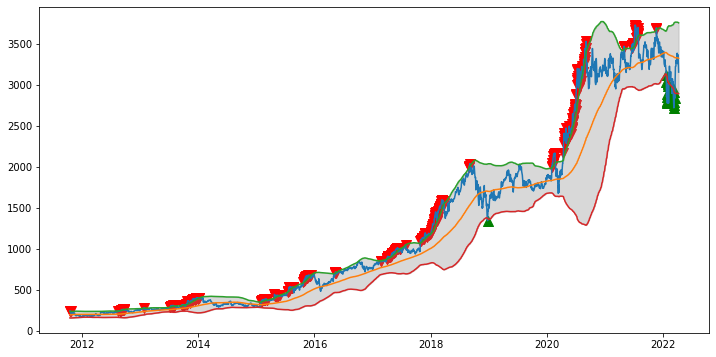

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker = '^', color='green', s = 100)
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker = 'v', color='red', s = 100)
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.show()

In [ ]:
buys = []
sells = []
open_pos = False

for i in range(len(df)):
  if df.Lower[i] > df.Close[i]:
    if open_pos == False:
      buys.append(i)
      open_pos = True

  elif df.Upper[i] < df.Close[i]:
    if open_pos:
      sells.append(i)
      open_pos = False


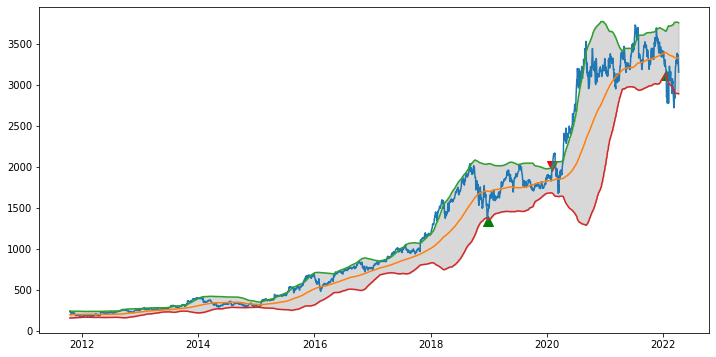

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker = '^', color='green', s = 100)
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker = 'v', color='red', s = 100)
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.show()

In [ ]:
merged = pd.concat([df.iloc[buys].Close, df.iloc[sells].Close], axis=1)

In [ ]:
merged.columns = ['Buys', 'Sells']
merged

,Buys,Sells
Date,,
2018-12-24,1343.959961,NaN
2020-01-31,NaN,2008.719971
2022-01-19,3125.979980,NaN


In [ ]:
totalprofit = merged.shift(-1).Sells - merged.Buys
totalprofit

Date
2018-12-24    664.76001
2020-01-31          NaN
2022-01-19          NaN
dtype: float64

In [ ]:
relprofits = (merged.shift(-1).Sells - merged.Buys)/merged.Buys
relprofits

Date
2018-12-24    0.494628
2020-01-31         NaN
2022-01-19         NaN
dtype: float64

In [ ]:
relprofits.mean()

0.49462783794683246